# Lecture 3 演習(アンケート結果の可視化)

第１回講義にて、簡単なアンケートを取りました。教員は、この結果はエクセルとしてダウンロードできます。

エクセル形式で保存されたアンケート結果を集計分析する例を、できるだけインタラクティブに再現してみました。

## エクセルを読む
最初にエクセル形式のファイル(ここでは*.xlsという古い形式のデータを読みます)

ファイルはmanabaに掲載しますので、ダウンロードしてからCorab環境にuploadしてください。

In [6]:
import pandas as pd
import numpy as np

df = pd.read_excel('data/query-66083-66917.xls',skiprows=4)
df

,mailaddr,grade,symgrade,comment,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,# メールアドレス,# 合計点,# 評価,# 講評,# 経過時間,# 提出,# 提出日時,# 回答1.1,# 回答1.2,# 回答1.3,# 回答1.4
1,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN


どうも第１行が、カラム名で、第２行はその説明、３行目以降が一人一人のアンケートのようです。

とりあえず２つを行います
- 取り扱うコラムは#回答1.1～回答1.4ですので、名前をつけなおします。(df.columnsにリストを代入すればコラム名は付け替えられました)
- 最初の２行を読み飛ばします(行に対するスライスを使ってます。)

In [7]:
df.columns=['col0','col1','col2','col3','col4','col5','col6','q1.1','q1.2','q1.3','q1.4']
df=df[2:]
df.head()

,col0,col1,col2,col3,col4,col5,col6,q1.1,q1.2,q1.3,q1.4
2,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,未提出,NaN,NaN,NaN,NaN,NaN


col5が'未提出'な行**以外**を絞り込み、さらにq1.1～q1.4のみを残します

In [8]:
df2=df[df.iloc[:,5]!='未提出']
df2=df2[['q1.1','q1.2','q1.3','q1.4']]
df2

,q1.1,q1.2,q1.3,q1.4
24,6,"1,2,3,4,5,7",2,"2,5"
25,1,"2,3,4,5",2,"1,3,5"
26,"1,2",2,3,"1,3"
60,"3,5,7","3,5",2,"1,4"
69,1,"3,4,5",2,"3,4"
80,"3,5","1,2,3,4,5",2,"1,3,4,5"
84,2,10,3,"1,2"
101,"1,7","2,9",3,"1,2"
105,1,2,3,"3,5"
110,"3,4,5","2,8",3,1


どうも最後の行がNaNで埋まっています、これは削除しましょう。

In [9]:
df2=df2.dropna(how='all')
df2

,q1.1,q1.2,q1.3,q1.4
24,6,"1,2,3,4,5,7",2,"2,5"
25,1,"2,3,4,5",2,"1,3,5"
26,"1,2",2,3,"1,3"
60,"3,5,7","3,5",2,"1,4"
69,1,"3,4,5",2,"3,4"
80,"3,5","1,2,3,4,5",2,"1,3,4,5"
84,2,10,3,"1,2"
101,"1,7","2,9",3,"1,2"
105,1,2,3,"3,5"
110,"3,4,5","2,8",3,1


## データの概要
さて質問は
- q1.1: 統計を学んだ経験について（複数選択）
- q1.2: 使ったことのあるプログラミング言語（複数選択)
- q1.3: Pythonを使った経験（３択）
- q1.4: データサイエンスに期待する項目は？(複数選択)

このように、複数選択可能なものがあり'1,2,3'のような文字列で複数選択結果が記録されています。

## q1.2　使ったことのあるプログラミング言語
まずは、複数選択された結果を含めて、使ったことのあるプログラミング言語の延べ数を集計します。

最初に、'q1.2'の列を取り出します。

In [13]:
df2['q1.2'].values

array(['1,2,3,4,5,7', '2,3,4,5', '2', '3,5', '3,4,5', '1,2,3,4,5', '10',
       '2,9', '2', '2,8', '1,3', '3', '1,2,3', '1,3', '3,9', '1,3,5,9',
       '1,8', '1', '2,3,5', '9', '10', '3', '10', '3,9', '3,6,9', '1',
       '10', '3', '10', '1,2,3,5,6,8', '3,5', '3', '2,3,5'], dtype=object)

'1,2,3'のような文字列を特定のセパレータ(ここでは',')でばらしたリストにするのにsplit()関数を追加います。

In [14]:
hoge='1,2,3'
hogehoge=hoge.split(',')
hogehoge

['1', '2', '3']

そて、q1.2列の値のリストに対して、それぞれの要素をsplit関数でバラバラにして、それを１つのリストとして集約します。

ここでは**残念ながら** for文を使っています。

In [16]:
ret=[]
q2list= df2['q1.2'].values
for i in range(len(q2list)):
  ret.extend(q2list[i].split(','))
ret

['1',
 '2',
 '3',
 '4',
 '5',
 '7',
 '2',
 '3',
 '4',
 '5',
 '2',
 '3',
 '5',
 '3',
 '4',
 '5',
 '1',
 '2',
 '3',
 '4',
 '5',
 '10',
 '2',
 '9',
 '2',
 '2',
 '8',
 '1',
 '3',
 '3',
 '1',
 '2',
 '3',
 '1',
 '3',
 '3',
 '9',
 '1',
 '3',
 '5',
 '9',
 '1',
 '8',
 '1',
 '2',
 '3',
 '5',
 '9',
 '10',
 '3',
 '10',
 '3',
 '9',
 '3',
 '6',
 '9',
 '1',
 '10',
 '3',
 '10',
 '1',
 '2',
 '3',
 '5',
 '6',
 '8',
 '3',
 '5',
 '3',
 '2',
 '3',
 '5']

さあ、ここで、得られたリストの値は、カテゴリー変数とよばれれる変数です、'1'～'10'のカテゴリー毎に出現件数を集計するのにcollection.Counterを使います。

In [17]:
import collections

c=collections.Counter(ret)
c

Counter({'1': 10,
         '2': 11,
         '3': 20,
         '4': 4,
         '5': 10,
         '7': 1,
         '10': 5,
         '9': 6,
         '8': 3,
         '6': 2})

Counterは一種の辞書dictになっています。ここでキーを'1','2'ではなくて、設問にあった選択枝'VBA','C/C++'で付け替えます。

popして代入することで１行で付け替えができることに注意ください。

In [18]:
c['VBA']=c.pop('1')
c['C/C++']=c.pop('2')
c['Python']=c.pop('3')
c['Ruby']=c.pop('4')
c['Java']=c.pop('5')
c['FORTRAN']=c.pop('6')
c['COBOL']=c.pop('7')
c['Basic']=c.pop('8')
c['Other']=c.pop('9')
c['Non']=c.pop('10')
c

Counter({'VBA': 10,
         'C/C++': 11,
         'Python': 20,
         'Ruby': 4,
         'Java': 10,
         'FORTRAN': 2,
         'COBOL': 1,
         'Basic': 3,
         'Other': 6,
         'Non': 5})

In [19]:
c.items()

dict_items([('VBA', 10), ('C/C++', 11), ('Python', 20), ('Ruby', 4), ('Java', 10), ('FORTRAN', 2), ('COBOL', 1), ('Basic', 3), ('Other', 6), ('Non', 5)])

In [20]:
c.values()

dict_values([10, 11, 20, 4, 10, 2, 1, 3, 6, 5])

## 円グラフの表示
それでは円グラフを描いてみましょう

Text(0.5, 1.0, 'Programming Language  Experience')

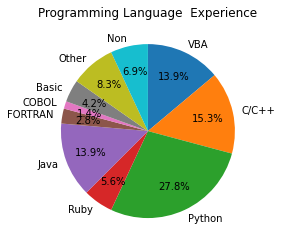

In [21]:
import matplotlib.pyplot as plt

plt.pie(c.values(),labels=c.keys(), counterclock=False, startangle=90, autopct="%.1f%%",
        pctdistance=0.7)
plt.title('Programming Language  Experience')

In [22]:
len(q2list)

33

## q1.3 Pythonを使った経験
これは、３択なので簡単です。

In [23]:
df2['q1.3']

24     2
25     2
26     3
60     2
69     2
80     2
84     3
101    3
105    3
110    3
122    2
139    2
167    1
171    2
172    1
187    2
191    3
192    3
194    1
195    3
198    3
206    3
208    3
209    2
211    2
212    3
213    3
215    2
216    3
217    2
218    2
223    2
224    2
Name: q1.3, dtype: object

In [24]:
c3=collections.Counter(df2['q1.3'])
c3

Counter({'2': 16, '3': 14, '1': 3})

In [25]:
c3['over 3years']=c3.pop('1')
c3['less than 3years']=c3.pop('2')
c3['no python']=c3.pop('3')
c3

Counter({'over 3years': 3, 'less than 3years': 16, 'no python': 14})

Text(0.5, 1.0, 'Python Experience')

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


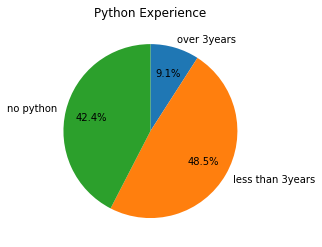

In [26]:
plt.rcParams['font.family'] = 'IPAexGothic'
plt.pie(c3.values(),labels=c3.keys(), counterclock=False, startangle=90, autopct="%.1f%%",
        pctdistance=0.7)
plt.title('Python Experience')

## q1.1　統計を学んだ経験
これも、複数選択された結果を集計します。


In [27]:
df2['q1.1']

24         6
25         1
26       1,2
60     3,5,7
69         1
80       3,5
84         2
101      1,7
105        1
110    3,4,5
122        5
139        1
167        3
171        5
172      2,5
187        2
191        5
192        5
194        5
195        2
198        6
206        1
208        1
209      4,5
211    2,4,5
212    3,4,5
213        6
215        6
216      3,6
217      1,2
218        2
223        5
224        6
Name: q1.1, dtype: object

In [28]:
q1list= df2['q1.1'].ravel()
ret=[]
for i in range(len(q1list)):
  ret.extend(q1list[i].split(','))
ret

['6',
 '1',
 '1',
 '2',
 '3',
 '5',
 '7',
 '1',
 '3',
 '5',
 '2',
 '1',
 '7',
 '1',
 '3',
 '4',
 '5',
 '5',
 '1',
 '3',
 '5',
 '2',
 '5',
 '2',
 '5',
 '5',
 '5',
 '2',
 '6',
 '1',
 '1',
 '4',
 '5',
 '2',
 '4',
 '5',
 '3',
 '4',
 '5',
 '6',
 '6',
 '3',
 '6',
 '1',
 '2',
 '2',
 '5',
 '6']

In [29]:
c1=collections.Counter(ret)
c1

Counter({'6': 6, '1': 9, '2': 8, '3': 6, '5': 13, '7': 2, '4': 4})

In [30]:
c1['HighSchool']=c1.pop('1')
c1['University']=c1.pop('2')
c1['GradSchool']=c1.pop('3')
c1['OJT']=c1.pop('4')
c1['SelfTaught']=c1.pop('5')
c1['NoStatistics']=c1.pop('6')
c1['Other']=c1.pop('7')

In [31]:
c1

Counter({'HighSchool': 9,
         'University': 8,
         'GradSchool': 6,
         'OJT': 4,
         'SelfTaught': 13,
         'NoStatistics': 6,
         'Other': 2})

Text(0.5, 1.0, 'Statistic Course Experience')

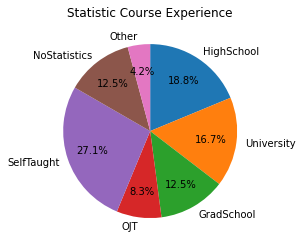

In [32]:
plt.pie(c1.values(),labels=c1.keys(), counterclock=False, startangle=90, autopct="%.1f%%",
        pctdistance=0.7)
plt.title('Statistic Course Experience')